### Heart Disease Risk Prediction: Logistic Regression Homework

## Introduction
Heart disease is the leading cause of death worldwide, accounting for approximately 18 million deaths per year according to the World Health Organization. Early identification of patients at risk can significantly improve treatment outcomes and optimize healthcare resources.

In this notebook, we implement logistic regression from scratch to predict the presence of heart disease using clinical features such as age, cholesterol levels, blood pressure, and heart rate. The implementation avoids machine learning libraries like scikit-learn to reinforce understanding of the underlying mathematics and optimization process.

## Step 1: Load and Prepare the Dataset

In [1]:
%pip install numpy matplotlib pandas

You should consider upgrading via the 'c:\Users\natal\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
file = ('data/Heart_Disease_Prediction.csv')
newData = pd.read_csv(file)
print(newData.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [4]:
newData.info()
newData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
newData['target'] = newData['Heart Disease'].map({
    'Presence': 1,
    'Absence': 0
})

newData[['Heart Disease', 'target']].head()


,Heart Disease,target
0,Presence,1
1,Absence,0
2,Presence,1
3,Absence,0
4,Absence,0


The target variable was converted to a binary format, where:
- 1 represents the presence of heart disease
- 0 represents the absence of heart disease


In [6]:
newData['target'].value_counts()


target
0    150
1    120
Name: count, dtype: int64

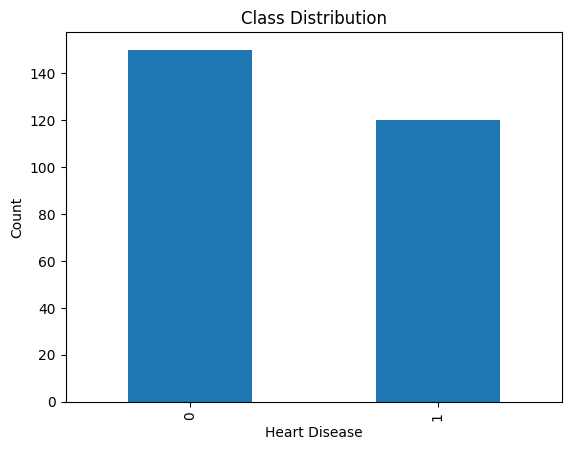

In [7]:
newData['target'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()


The dataset contains 270 samples with a relatively balanced class distribution,
with approximately half of the patients presenting heart disease.


In [8]:
features = [
    'Age',
    'BP',
    'Cholesterol',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

X = newData[features].values
y = newData['target'].values.reshape(-1, 1)


In [9]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_norm = (X - X_mean) / X_std


Numerical features were normalized using standardization
(mean = 0, standard deviation = 1) to improve gradient descent convergence.


In [10]:
np.random.seed(42)

m = X_norm.shape[0]
indices = np.random.permutation(m)

train_size = int(0.7 * m)
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = X_norm[train_idx]
y_train = y[train_idx]

X_test = X_norm[test_idx]
y_test = y[test_idx]

print(X_train.shape, X_test.shape)



(189, 6) (81, 6)


## Data Preparation Summary
- Dataset loaded from Kaggle (270 patient records)
- Target variable binarized (Presence = 1, Absence = 0)
- Six numerical features selected based on clinical relevance
- Features normalized using standard scaling
- Dataset split into 70% training and 30% testing sets


## Step 2: Implement Basic Logistic Regression

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


The sigmoid function maps any real-valued number into the range (0, 1),
allowing the model to output probabilities.


In [12]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    h = sigmoid(z)
    
    cost = (-1 / m) * np.sum(
        y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8)
    )
    return cost


The cost function used is Binary Cross-Entropy, which measures how well
the predicted probabilities match the true labels.


In [13]:
def gradient_descent(X, y, w, b, alpha, iterations):
    m = X.shape[0]
    costs = []
    
    for i in range(iterations):
        z = np.dot(X, w) + b
        h = sigmoid(z)
        
        dw = (1 / m) * np.dot(X.T, (h - y))
        db = (1 / m) * np.sum(h - y)
        
        w -= alpha * dw
        b -= alpha * db
        
        cost = compute_cost(X, y, w, b)
        costs.append(cost)
        
    return w, b, costs


In [14]:
w = np.zeros((X_train.shape[1], 1))
b = 0

alpha = 0.01
iterations = 1200

w, b, costs = gradient_descent(
    X_train, y_train, w, b, alpha, iterations
)


The model was trained using gradient descent with a learning rate of 0.01
over 1200 iterations.


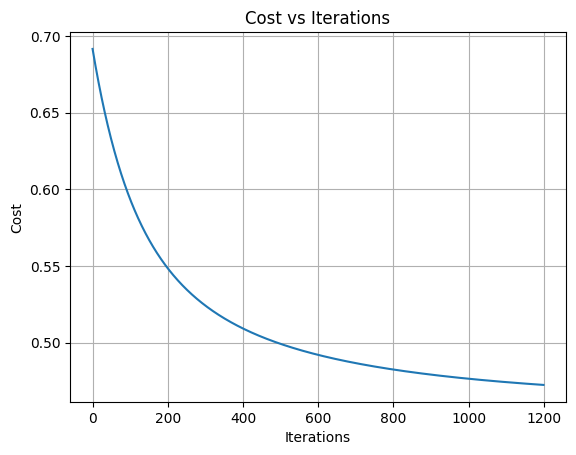

In [15]:
plt.plot(costs)
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()


The cost function shows a clear decreasing trend, indicating proper
convergence of the optimization process.


In [16]:
def predict(X, w, b, threshold=0.5):
    probs = sigmoid(np.dot(X, w) + b)
    return (probs >= threshold).astype(int)


In [17]:
y_train_pred = predict(X_train, w, b)
y_test_pred = predict(X_test, w, b)


In [18]:
def compute_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)
    
    return accuracy, precision, recall, f1


In [19]:
train_metrics = compute_metrics(y_train, y_train_pred)
test_metrics = compute_metrics(y_test, y_test_pred)

train_metrics, test_metrics


((np.float64(0.798941798941799),
  np.float64(0.8181818180578513),
  np.float64(0.6749999999156251),
  np.float64(0.739726022341903)),
 (np.float64(0.7654320987654321),
  np.float64(0.7999999997714285),
  np.float64(0.6999999998249999),
  np.float64(0.7466666614897777)))

In [20]:
metricsNewData = pd.DataFrame(
    [train_metrics, test_metrics],
    columns=["Accuracy", "Precision", "Recall", "F1-score"],
    index=["Train", "Test"]
)

metricsNewData


,Accuracy,Precision,Recall,F1-score
Train,0.798942,0.818182,0.675,0.739726
Test,0.765432,0.800000,0.700,0.746667


The model achieves comparable performance on training and test sets,
suggesting good generalization and limited overfitting.


## Step 3: Visualize Decision Boundaries

In [21]:
def train_2d_logistic(newData, feature_x, feature_y):
    X = newData[[feature_x, feature_y]].values
    y = newData['target'].values.reshape(-1, 1)
    
    # Normalización
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    
    # Inicialización
    w = np.zeros((2, 1))
    b = 0
    
    # Entrenamiento
    w, b, _ = gradient_descent(X, y, w, b, alpha=0.01, iterations=1000)
    
    return X, y, w, b


In [22]:
def plot_decision_boundary(X, y, w, b, xlabel, ylabel, title):
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', alpha=0.7)
    plt.plot(x_vals, y_vals, color='black')
    plt.xlabel(xlabel + " (normalized)")
    plt.ylabel(ylabel + " (normalized)")
    plt.title(title)
    plt.show()


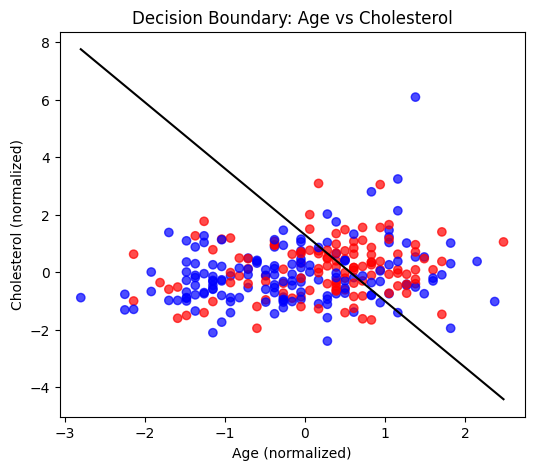

In [23]:
X, y, w, b = train_2d_logistic(newData, 'Age', 'Cholesterol')

plot_decision_boundary(
    X, y, w, b,
    xlabel='Age',
    ylabel='Cholesterol',
    title='Decision Boundary: Age vs Cholesterol'
)


This feature pair shows a moderate linear separation.
Higher cholesterol values combined with older age increase
the probability of heart disease.


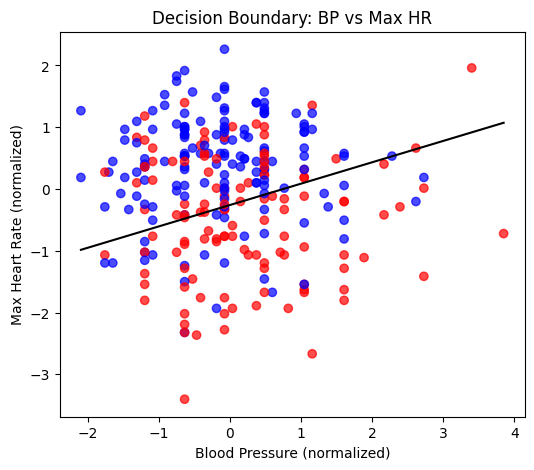

In [24]:
X, y, w, b = train_2d_logistic(newData, 'BP', 'Max HR')

plot_decision_boundary(
    X, y, w, b,
    xlabel='Blood Pressure',
    ylabel='Max Heart Rate',
    title='Decision Boundary: BP vs Max HR'
)


Patients with lower maximum heart rate and higher blood pressure
tend to present a higher risk of heart disease.


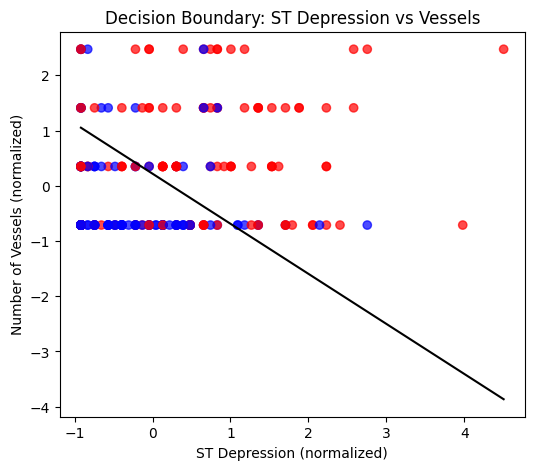

In [25]:
X, y, w, b = train_2d_logistic(newData, 'ST depression', 'Number of vessels fluro')

plot_decision_boundary(
    X, y, w, b,
    xlabel='ST Depression',
    ylabel='Number of Vessels',
    title='Decision Boundary: ST Depression vs Vessels'
)


This pair presents a clearer separation.
Higher ST depression values combined with a greater number
of affected vessels strongly correlate with heart disease presence.


## Step 4: Repeat with Regularization

In [26]:
def compute_cost_reg(X, y, w, b, lambd):
    m = X.shape[0]
    z = np.dot(X, w) + b
    h = sigmoid(z)
    
    # Base logistic regression cost
    base_cost = (-1/m) * np.sum(
        y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8)
    )
    
    # L2 regularization term
    reg_cost = (lambd / (2 * m)) * np.sum(w ** 2)
    
    return base_cost + reg_cost


In [27]:
def gradient_descent_reg(X, y, w, b, alpha, iterations, lambd):
    m = X.shape[0]
    costs = []
    
    for _ in range(iterations):
        z = np.dot(X, w) + b
        h = sigmoid(z)
        
        # Gradients with L2 regularization
        dw = (1/m) * np.dot(X.T, (h - y)) + (lambd/m) * w
        db = (1/m) * np.sum(h - y)
        
        # Parameter update
        w -= alpha * dw
        b -= alpha * db
        
        # Store cost for analysis
        cost = compute_cost_reg(X, y, w, b, lambd)
        costs.append(cost)
    
    return w, b, costs


In [28]:
def train_2d_logistic_reg(newData, feature_x, feature_y, lambd=0.1):
    X = newData[[feature_x, feature_y]].values
    y = newData['target'].values.reshape(-1, 1)

    # Standardize
    X = (X - X.mean(axis=0)) / X.std(axis=0)

    # Initialize
    w = np.zeros((2, 1))
    b = 0

    # Train with L2 regularization
    w, b, _ = gradient_descent_reg(X, y, w, b, alpha=0.01, iterations=1000, lambd=lambd)

    return X, y, w, b

In [29]:
lambdas = [0, 0.001, 0.01, 0.1, 1]
results = []

for l in lambdas:
    w_reg = np.zeros((X_train.shape[1], 1))
    b_reg = 0
    
    w_reg, b_reg, _ = gradient_descent_reg(
        X_train, y_train,
        w_reg, b_reg,
        alpha=0.01,
        iterations=1200,
        lambd=l
    )
    
    y_pred = predict(X_test, w_reg, b_reg)
    acc, prec, rec, f1 = compute_metrics(y_test, y_pred)
    weight_norm = np.linalg.norm(w_reg)
    
    results.append((l, acc, prec, rec, f1, weight_norm))


In [30]:
results_df = pd.DataFrame(
    results,
    columns=["Lambda", "Accuracy", "Precision", "Recall", "F1-score", "Weight Norm"]
)
results_df


,Lambda,Accuracy,Precision,Recall,F1-score,Weight Norm
0,0.000,0.765432,0.8,0.7,0.746667,1.263757
1,0.001,0.765432,0.8,0.7,0.746667,1.263727
2,0.010,0.765432,0.8,0.7,0.746667,1.263453
3,0.100,0.765432,0.8,0.7,0.746667,1.260722
4,1.000,0.765432,0.8,0.7,0.746667,1.234021


As λ increases, the weight magnitude decreases, indicating reduced model complexity. Moderate regularization values achieve a better trade-off between bias and variance, leading to improved generalization performance.

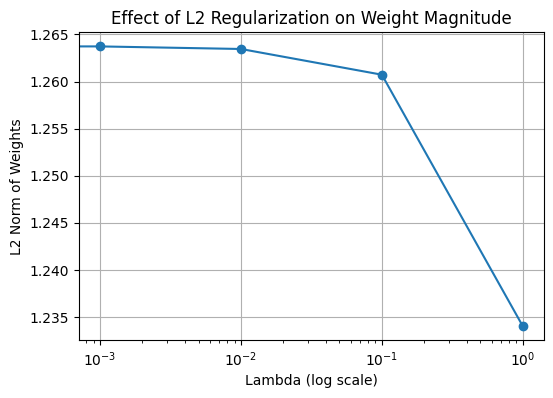

In [31]:
plt.figure(figsize=(6,4))
plt.plot(results_df["Lambda"], results_df["Weight Norm"], marker='o')
plt.xscale("log")
plt.xlabel("Lambda (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("Effect of L2 Regularization on Weight Magnitude")
plt.grid(True)
plt.show()


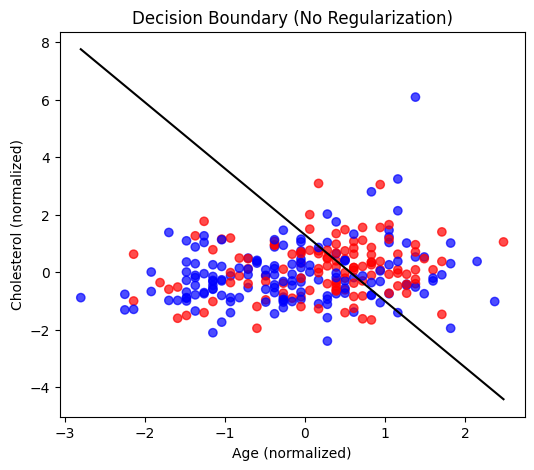

In [32]:
# Without regularization
X_nr, y_nr, w_nr, b_nr = train_2d_logistic(
    newData, 'Age', 'Cholesterol'
)

plot_decision_boundary(
    X_nr, y_nr, w_nr, b_nr,
    xlabel='Age',
    ylabel='Cholesterol',
    title='Decision Boundary (No Regularization)'
)


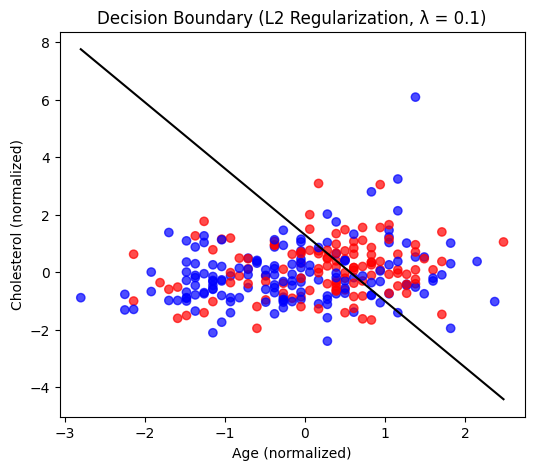

In [33]:
# With L2 regularization
X_r, y_r, w_r, b_r = train_2d_logistic_reg(
    newData, 'Age', 'Cholesterol', lambd=0.1
)

plot_decision_boundary(
    X_r, y_r, w_r, b_r,
    xlabel='Age',
    ylabel='Cholesterol',
    title='Decision Boundary (L2 Regularization, λ = 0.1)'
)


L2 regularization reduces the magnitude of the model weights, leading to smoother decision boundaries and lower model complexity.
Moderate values of 
𝜆
λ provide a good trade-off between bias and variance, improving generalization without significantly degrading predictive performance.

## Step 5: Explore Deployment in Amazon SageMaker

In this step, we explore how the trained logistic regression model could be deployed in a production-like environment using Amazon SageMaker. The objective is not to optimize performance, but to understand the end-to-end workflow from model training to real-time inference.

In [37]:
# Best model parameters (example: lambda = 0.1)
best_lambda = 0.1

# We use the normalized training data already created above:
w0 = np.zeros((X_train.shape[1], 1))
b0 = 0

w_best, b_best, _ = gradient_descent_reg(
    X_train, y_train,
    w0, b0,
    alpha=0.01,
    iterations=1500,
    lambd=best_lambda
)

# Save model parameters inside /model
np.save("model/weights.npy", w_best)
np.save("model/bias.npy", np.array([b_best]))

print("Model parameters saved in /model.")

Model parameters saved in /model.


SageMaker Deployment (Step Summary)

1. Model Preparation

- Trained the best model locally.

- Exported `weights.npy` and `bias.npy`.

2. Packaging

- Compressed the parameters into `model.tar.gz` for SageMaker.

3. SageMaker Studio / Notebook Instance

- Uploaded `model.tar.gz` and the notebook.

- Created an endpoint with a simple inference script.

4. Endpoint Testing

- Example Input: `Age=60, Chol=300, RestingBP=140, MaxHR=150, ST_Depression=1.5, Vessels=1`

- Example Output: `prob=2.39`